In [22]:
import numpy as np
import pandas as pd
data_path = r"C:\Users\MSI GAMING\Documents\Khai phá dữ liệu\Lab03_Lê Thành Danh_3123580005\Phần 2\Bài tập thực hành 2\diabetes.csv"
df = pd.read_csv(data_path)

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
dfsort = df.sort_values('Outcome', ascending =
False)
dfsort.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
236,7,181,84,21,192,35.9,0.586,51,1
2,8,183,64,0,0,23.3,0.672,32,1
237,0,179,90,27,0,44.1,0.686,23,1
4,0,137,40,35,168,43.1,2.288,33,1


## Trực quan hóa dữ liệu với Matplotlib

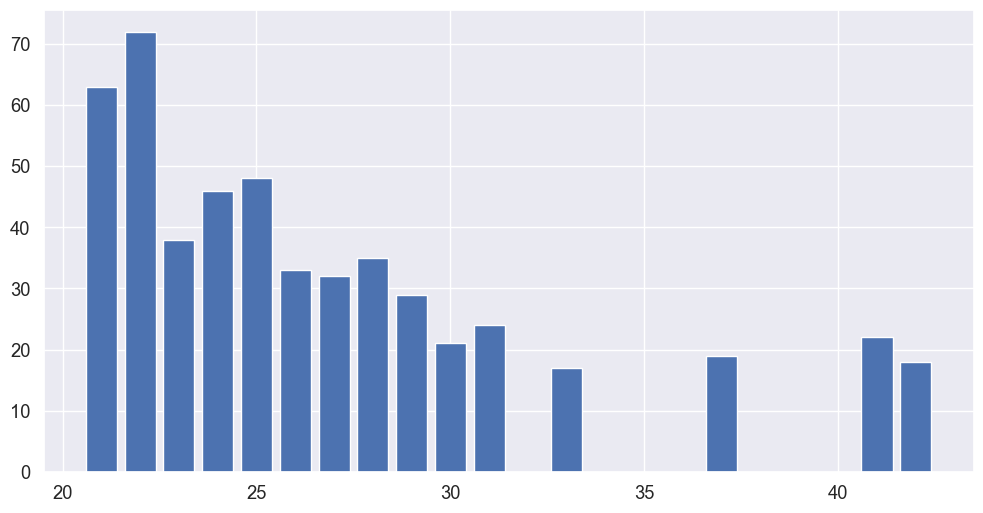

In [ ]:
import matplotlib.pyplot as plt
age_counts = df['Age'].value_counts().sort_index()
avg_glucose_by_age = df.groupby('Age')['Glucose'].mean()
age_counts_df = age_counts.reset_index()
age_counts_df.columns = ['Age', 'Count']

avg_glucose_df = avg_glucose_by_age.reset_index()
avg_glucose_df.columns = ['Age', 'Average_Glucose']

# Lấy 15 nhóm tuổi có số lượng bệnh nhân đông nhất để biểu đồ gọn hơn
top_15_ages = age_counts_df.sort_values('Count', ascending=False).head(15)
top_15_glucose = avg_glucose_df[avg_glucose_df['Age'].isin(top_15_ages['Age'])]
#Case 1
x = top_15_ages['Age']
y = top_15_ages['Count']
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.show()

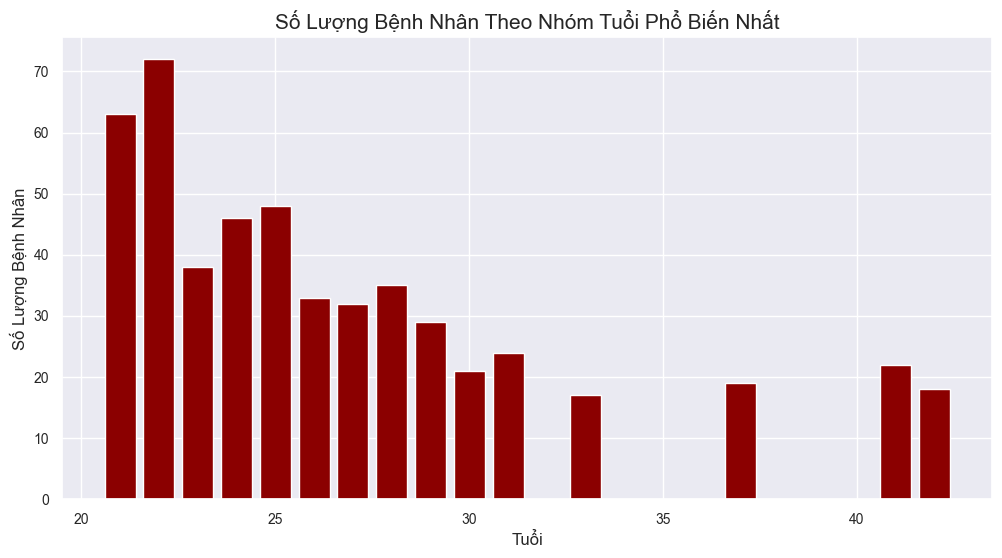

In [ ]:
#Case 2
x = top_15_ages['Age']
y = top_15_ages['Count']
plt.figure(figsize=(12, 6))
plt.bar(x, y, color ="darkred")
plt.title('Số Lượng Bệnh Nhân Theo Nhóm Tuổi Phổ Biến Nhất', fontsize=15)
plt.xlabel('Tuổi', fontsize=12)
plt.ylabel('Số Lượng Bệnh Nhân', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

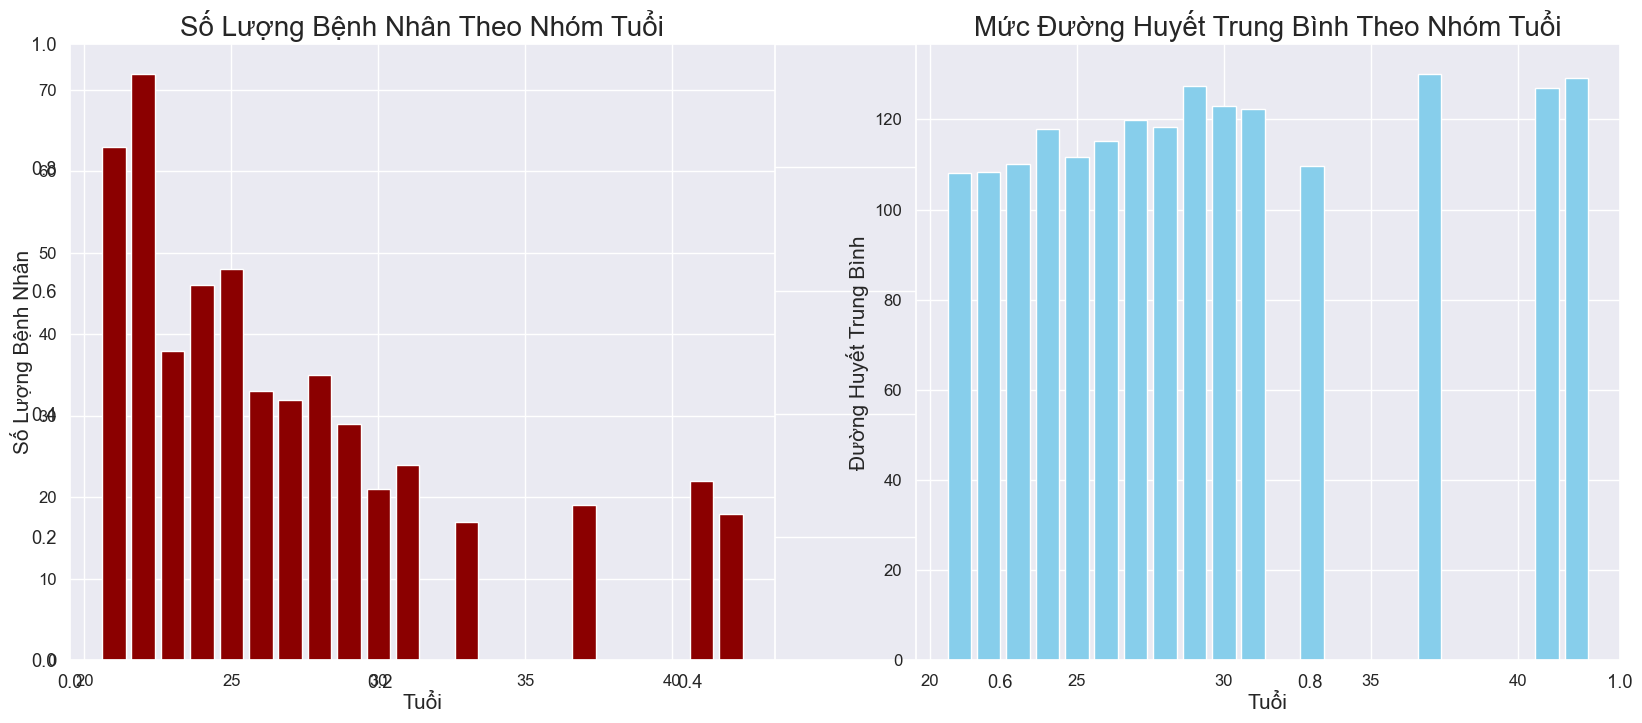

In [ ]:
#Case 3
x = top_15_ages['Age']
y1 = top_15_ages['Count']
y2 = top_15_glucose.set_index('Age').loc[x.sort_values().unique()]['Average_Glucose']

# Tạo subplots
fig, ax = plt.subplots(figsize=(20, 8))

# Biểu đồ thứ nhất
plt.subplot(1, 2, 1)
plt.bar(x, y1,color="darkred")
plt.title('Số Lượng Bệnh Nhân Theo Nhóm Tuổi', fontsize=20)
plt.xlabel('Tuổi', fontsize=15)
plt.ylabel('Số Lượng Bệnh Nhân', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Biểu đồ thứ hai
plt.subplot(1, 2, 2)
plt.bar(x, y2, color = "skyblue")
plt.title('Mức Đường Huyết Trung Bình Theo Nhóm Tuổi', fontsize=20)
plt.xlabel('Tuổi', fontsize=15)
plt.ylabel('Đường Huyết Trung Bình', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## Trực quan hóa dữ liệu bằng Seaborn

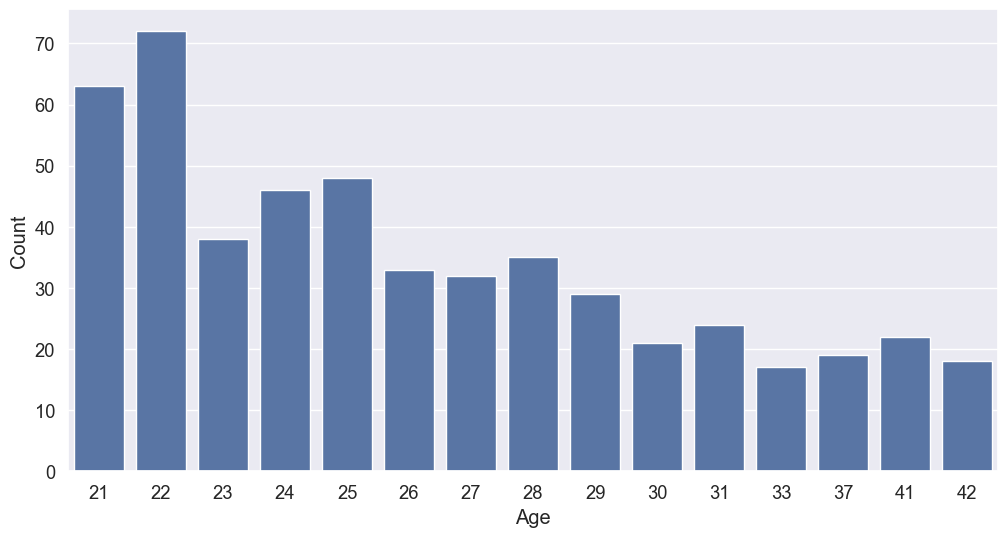

In [ ]:
import seaborn as sns
#Case 1
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_ages, x='Age', y='Count')
plt.show()

C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_21252\2469890073.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_15_ages, x='Age', y='Count', palette='viridis')


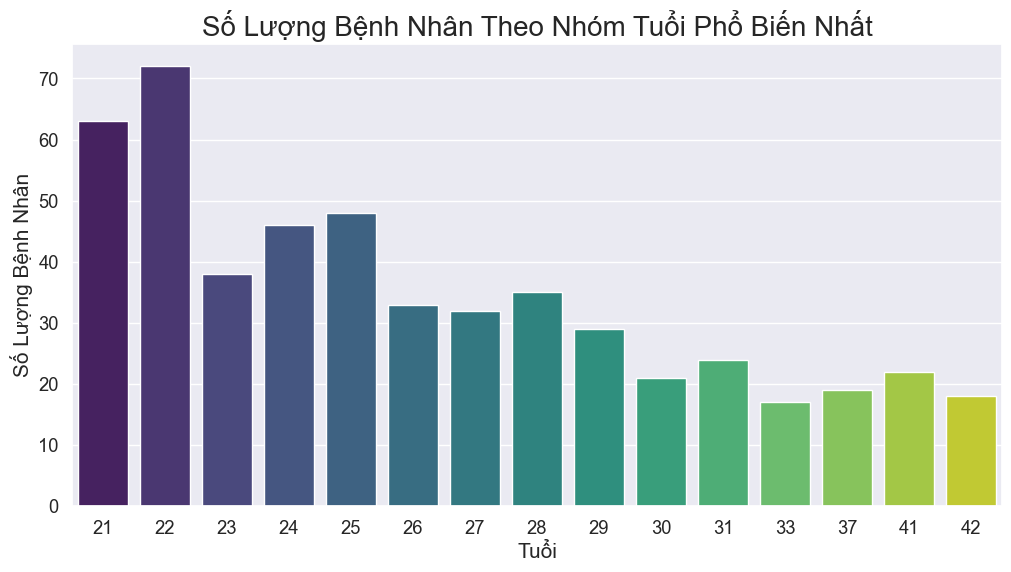

In [ ]:
#Case 2
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_15_ages, x='Age', y='Count', palette='viridis')
ax.set_title('Số Lượng Bệnh Nhân Theo Nhóm Tuổi Phổ Biến Nhất', fontsize=20)
ax.set_xlabel('Tuổi', fontsize=15)
ax.set_ylabel('Số Lượng Bệnh Nhân', fontsize=15)
plt.show()

C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_21252\2556782951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=top_15_ages, x='Age', y='Count', ax=axes[0],palette='mako')
C:\Users\MSI GAMING\AppData\Local\Temp\ipykernel_21252\2556782951.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=top_15_glucose, x='Age', y='Average_Glucose', ax=axes[1],palette='rocket')


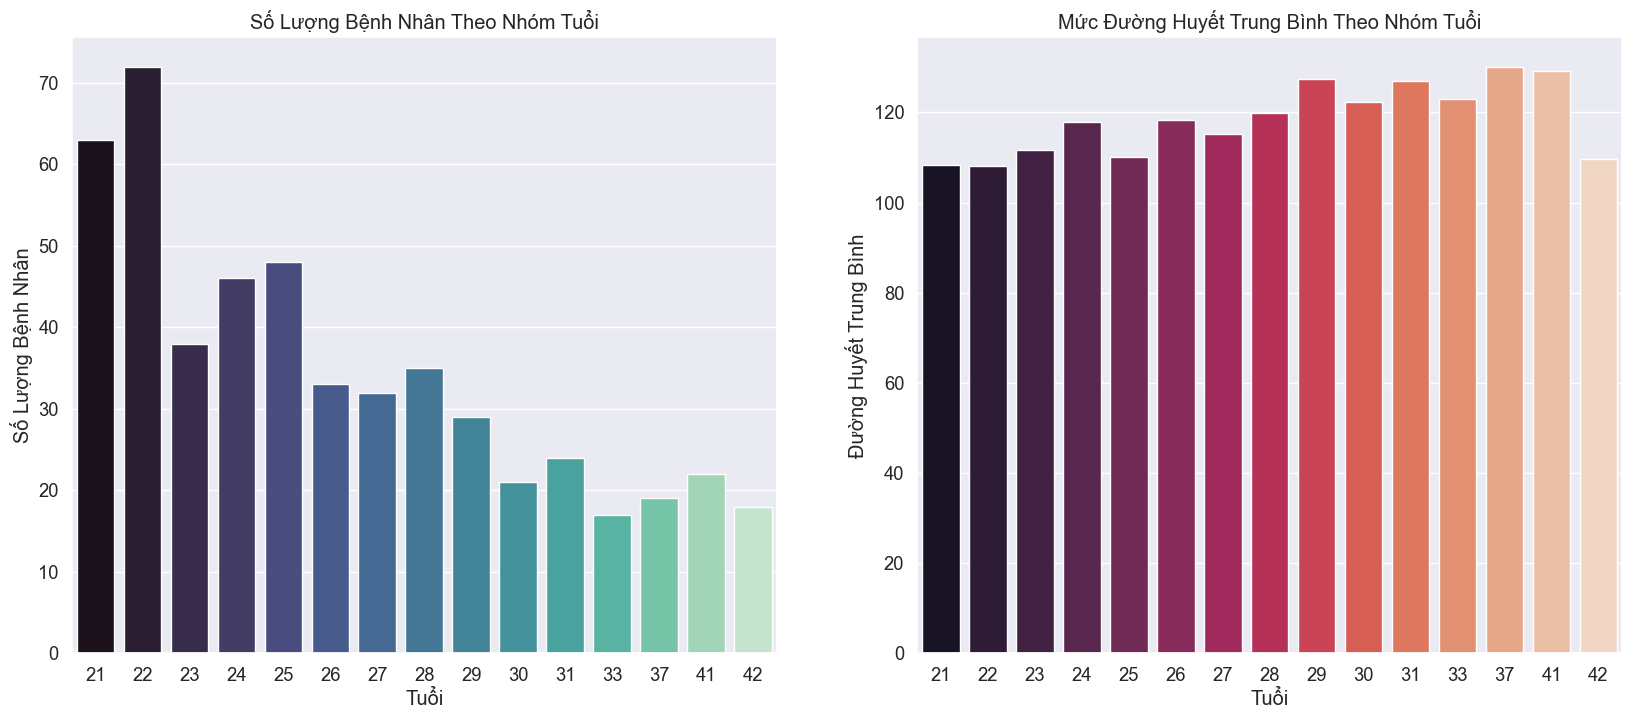

In [ ]:
#Case 3
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.set(font_scale=1.2)

# Biểu đồ thứ nhất
ax1 = sns.barplot(data=top_15_ages, x='Age', y='Count', ax=axes[0],palette='mako')
ax1.set_title('Số Lượng Bệnh Nhân Theo Nhóm Tuổi')
ax1.set_xlabel('Tuổi')
ax1.set_ylabel('Số Lượng Bệnh Nhân')

# Biểu đồ thứ hai
ax2 = sns.barplot(data=top_15_glucose, x='Age', y='Average_Glucose', ax=axes[1],palette='rocket')
ax2.set_title('Mức Đường Huyết Trung Bình Theo Nhóm Tuổi')
ax2.set_xlabel('Tuổi')
ax2.set_ylabel('Đường Huyết Trung Bình')

plt.show()